In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pathlib
import os

from skluc.main.utils import logger

matplotlib.rcParams.update({'font.size': 14})
pd.set_option('display.expand_frame_repr', False)

2019-01-14 08:44:24,083 [455] DEBUG    matplotlib.backends: backend module://ipykernel.pylab.backend_inline version unknown


In [29]:
def build_df(dirname, filename):
    filepath = os.path.join(dirname, filename)
    df = pd.read_csv(filepath)
    df = df.apply(pd.to_numeric, errors="ignore")
    df = df.drop_duplicates()
    col_to_delete = ['--chi-square-PD-kernel', '--chi-square-kernel',
       '--cifar10', '--cifar100', '--exp-chi-square-kernel',
       '--intercept-constant', '--laplacian-kernel', '--linear-kernel',
       '--mnist', '--quiet', '--rbf-kernel',
       '--sigmoid-kernel',  '--svhn',
       '--tensorboard', '--validation-size', "--dropout", "--gamma",
       'deepstrom','dense', "--tanh-activation", "--normalize-l2", "kernel",
                     "--non-linear", "--non-linearity", 
                     "--train-size", "--second-layer-size", "activation_function",
                     "deepstrom_activation", "--real-nystrom"
            ]
    for c in col_to_delete:
        df = df.drop([c], axis=1)
    return df


In [30]:
DIRNAME = "/home/luc/PycharmProjects/deepstrom_network/results/2019-01/classif_end_to_end_dense_mnist_svhn/"
FILENAME = "gathered_results.csv"
df = build_df(DIRNAME, FILENAME)

In [31]:
df

--batch-size  --learning-rate  --num-epoch --nys-size  --out-dim  --seed dataset network  test_acc  test_eval_time    train_time training_time   val_acc  val_eval_time  file_timestamp
0            128            0.001          175       None        128       3    svhn   dense  0.945082       12.027502  17569.602097          None  0.933093       5.072201      1547221022
1            128            0.001          175       None         16       2    svhn   dense  0.948969       11.118558  17591.282983          None  0.946014       4.730723      1547209294
2            128            0.001          175       None        128       0    svhn   dense  0.949084        4.345680   7825.684137          None  0.942608       2.306083      1547189057
3            128            0.001          175       None         64       0   mnist   dense  0.989683        0.226355   1989.981762          None  0.990385       0.304526      1547185076
4            128            0.001          175       None         16       2   mnist   dense  0.984275        0.246827   1979.989994          None  0.983073       0.321278      1547204810
5            128            0.001          175       None        512       4   mnist   dense  0.990585        0.241407   2012.514075          None  0.992588       0.324448      1547226728
6            128            0.001          175       None         16       3   mnist   dense  0.981671        0.244404   1833.351054          None  0.979067       0.298134      1547219168
7            128            0.001          175       None        512       2    svhn   dense  0.944543        4.466484   7924.485122          None  0.939904       2.371201      1547218774
8            128            0.001          175       None        512       3    svhn   dense  0.954895       13.075561  18281.719823          None  0.943409       5.737347      1547222465
9            128            0.001          175       None        256       3    svhn   dense  0.945351       11.742174  17461.067575          None  0.935697       5.006155      1547222000
10           128            0.001          175       None        256       4    svhn   dense  0.950393        6.761099   8026.301511          None  0.943510       2.630205      1547228751
11           128            0.001          175       None         64       4   mnist   dense  0.989083        0.232034   1805.518368          None  0.988181       0.283096      1547225133
12           128            0.001          175       None        256       1    svhn   dense  0.949969       11.689236  17417.552039          None  0.939103       4.964081      1547202793
13           128            0.001          175       None        256       0    svhn   dense  0.932997        4.518845   7879.287875          None  0.920573       2.343869      1547196906
14           128            0.001          175       None        256       3   mnist   dense  0.990986        0.414073   3331.622326          None  0.990585       0.537849      1547219796
15           128            0.001          175       None         16       0   mnist   dense  0.987280        0.246617   1953.936504          None  0.985477       0.316507      1547185071
16           128            0.001          175       None        128       1    svhn   dense  0.955550       12.044019  17599.098193          None  0.947917       5.032614      1547201763
17           128            0.001          175       None        128       0   mnist   dense  0.990385        0.224182   1705.925383          None  0.988281       0.281892      1547186468
18           128            0.001          175       None         64       2   mnist   dense  0.988181        0.212466   1698.607677          None  0.986779       0.280550      1547205838
19           128            0.001          175       None        512       0    svhn   dense  0.946736        4.351847   7842.833263          None  0.944411       2.331053      1547196917
20           128            0.001          175       Non

In [34]:
def get_sorted_acc_for_dataset(df_, name):
    df_dataset = df_[df_["dataset"] == name]
    df_dataset = df_dataset[df_dataset["--seed"] == 0]
    df_dataset = df_dataset.sort_values(by="val_acc", ascending=False)
    return df_dataset

In [35]:
get_sorted_acc_for_dataset(df, "mnist")

--batch-size  --learning-rate  --num-epoch --nys-size  --out-dim  --seed dataset network  test_acc  test_eval_time   train_time training_time   val_acc  val_eval_time  file_timestamp
24           128            0.001          175       None        256       0   mnist   dense  0.991286        0.265861  1975.734110          None  0.992488       0.350544      1547187045
26           128            0.001          175       None        512       0   mnist   dense  0.989984        0.264391  1972.166228          None  0.991687       0.369703      1547187075
3            128            0.001          175       None         64       0   mnist   dense  0.989683        0.226355  1989.981762          None  0.990385       0.304526      1547185076
17           128            0.001          175       None        128       0   mnist   dense  0.990385        0.224182  1705.925383          None  0.988281       0.281892      1547186468
15           128            0.001          175       None         16       0   mnist   dense  0.987280        0.246617  1953.936504          None  0.985477       0.316507      1547185071

In [37]:
get_sorted_acc_for_dataset(df, "svhn")

--batch-size  --learning-rate  --num-epoch --nys-size  --out-dim  --seed dataset network  test_acc  test_eval_time    train_time training_time   val_acc  val_eval_time  file_timestamp
19           128            0.001          175       None        512       0    svhn   dense  0.946736        4.351847   7842.833263          None  0.944411       2.331053      1547196917
2            128            0.001          175       None        128       0    svhn   dense  0.949084        4.345680   7825.684137          None  0.942608       2.306083      1547189057
25           128            0.001          175       None         16       0    svhn   dense  0.951393       11.087209  17612.291169          None  0.939503       4.781024      1547188191
48           128            0.001          175       None         64       0    svhn   dense  0.941926        4.472047   7838.101149          None  0.934796       2.309180      1547189032
13           128            0.001          175       None        256       0    svhn   dense  0.932997        4.518845   7879.287875          None  0.920573       2.343869      1547196906

In [16]:
method_names = set(df["network"].values)
kernel_names = set(df["kernel"].values)
nys_size = set(df["--nys-size"].values)
gamma_values = set(df["--gamma"].values)
gamma_values.remove("None")
datasets = set(df["dataset"].values)

logger.debug("Nystrom possible sizes are: {}".format(nys_size))
logger.debug("Datasets: {}".format(datasets))
logger.debug("Kernel functions are: {}".format(kernel_names))
logger.debug("Compared network types are: {}".format(method_names))

2019-01-08 11:18:06,866 [29644] DEBUG    root: Nystrom possible sizes are: {32, 64, 128, 8, 16}
2019-01-08 11:18:06,868 [29644] DEBUG    root: Datasets: {'mnist', 'svhn'}
2019-01-08 11:18:06,870 [29644] DEBUG    root: Kernel functions are: {'linear', 'rbf', 'chi2_cpd'}
2019-01-08 11:18:06,872 [29644] DEBUG    root: Compared network types are: {'deepstrom'}


In [17]:
nb_classes_datasets = {
    "svhn": 10,
    "cifar10": 10,
    "mnist": 10,
    "cifar100": 100
}

nb_feature_convs = {
    "svhn": 512,
    "cifar10": 512,
    "mnist": 16,
    "cifar100": 512
}

min_acc = 0
max_acc = 1

In [20]:
def post_processing_figures(f, ax, nbparamdeepstrom, subsample_sizes):
    ax.set_ylim(min_acc, max_acc)
    ax.set_ylabel("Accuracy")
    ax.set_xticks([1e4, 1e5, 1e6])
    ax.set_xlabel("# Learnable Parameters")
    ax.legend(bbox_to_anchor=(0.5, -0.20), loc="upper center", ncol=2)
    ax.set_xticklabels([1e4, 1e5, 1e6])
    ax.set_xscale("symlog")

    ax_twin = ax.twiny()
    ax_twin.set_xscale("symlog")
    ax_twin.set_xlim(ax.get_xlim())
    ax_twin.set_xticks(sorted(nbparamdeepstrom))
    ax_twin.set_xticklabels(sorted(subsample_sizes))
    ax_twin.set_xlabel("Subsample Size")
    ax.set_title("{}".format(DATANAME), y=1.2)

    f.set_size_inches(8, 6)
    f.tight_layout()
    f.subplots_adjust(bottom=0.3)

    out_name = "end_to_end_{}".format(DATANAME)
    return
    base_out_dir = os.path.abspath(__file__.split(".")[0])
    base_out_dir_path = pathlib.Path(base_out_dir) / "images"
    base_out_dir_path.mkdir(parents=True, exist_ok=True)
    out_path = obase_out_dir_path / out_name
    logger.debug(out_path)
    f.savefig(out_path)

2019-01-08 11:20:44,454 [29644] DEBUG    matplotlib.font_manager: findfont: Matching :family=sans-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=12.0 to DejaVu Sans ('/home/luc/anaconda3/envs/ml/lib/python3.6/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf') with score of 0.050000
2019-01-08 11:20:44,491 [29644] DEBUG    matplotlib.font_manager: findfont: Matching :family=sans-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0 to DejaVu Sans ('/home/luc/anaconda3/envs/ml/lib/python3.6/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf') with score of 0.050000
2019-01-08 11:20:44,499 [29644] DEBUG    matplotlib.font_manager: findfont: Matching :family=STIXGeneral:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0 to STIXGeneral ('/home/luc/anaconda3/envs/ml/lib/python3.6/site-packages/matplotlib/mpl-data/fonts/ttf/STIXGeneral.ttf') with score of 0.050000
2019-01-08 11:20:44,508 [29644] DEBUG    matplotlib.font

[0.93309295 0.95592949 0.96063702 0.96895032 0.9672476 ]
[0.94691506 0.93269231 0.96123798 0.96264022 0.96564503]
[0.91977163 0.95873397 0.96444311 0.96033654 0.97455929]
[0.89683494 0.94491186 0.95763221 0.73818109 0.84014423]
[0.92568109 0.95933494 0.95783253 0.94601362 0.96654647]


2019-01-08 11:20:44,585 [29644] DEBUG    matplotlib.font_manager: findfont: Matching :family=cmr10:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0 to cmr10 ('/home/luc/anaconda3/envs/ml/lib/python3.6/site-packages/matplotlib/mpl-data/fonts/ttf/cmr10.ttf') with score of 0.050000
2019-01-08 11:20:44,593 [29644] DEBUG    matplotlib.font_manager: findfont: Matching :family=cmtt10:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0 to cmtt10 ('/home/luc/anaconda3/envs/ml/lib/python3.6/site-packages/matplotlib/mpl-data/fonts/ttf/cmtt10.ttf') with score of 0.050000
2019-01-08 11:20:44,600 [29644] DEBUG    matplotlib.font_manager: findfont: Matching :family=cmmi10:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0 to cmmi10 ('/home/luc/anaconda3/envs/ml/lib/python3.6/site-packages/matplotlib/mpl-data/fonts/ttf/cmmi10.ttf') with score of 0.050000
2019-01-08 11:20:44,606 [29644] DEBUG    matplotlib.font_manager: findfont: Matching :family=cmb10:s

[0.94900708 0.95731989 0.95997537 0.96089901 0.95774323]
[0.95308651 0.95924415 0.96078356 0.96062962 0.96089901]
[0.78556034 0.95593442 0.95431804 0.95866687 0.91656404]
[0.93053417 0.9619766  0.95701201 0.95604988 0.95839748]
[0.94361915 0.96036022 0.95412562 0.95905172 0.96186115]


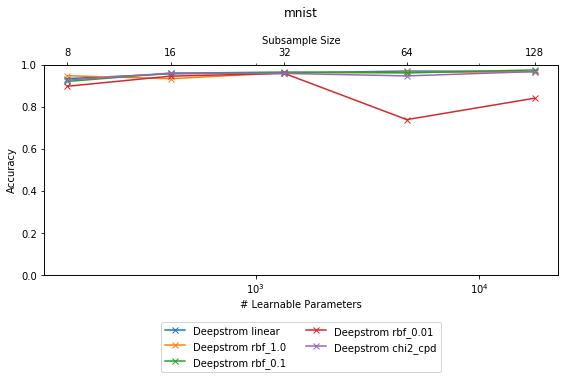

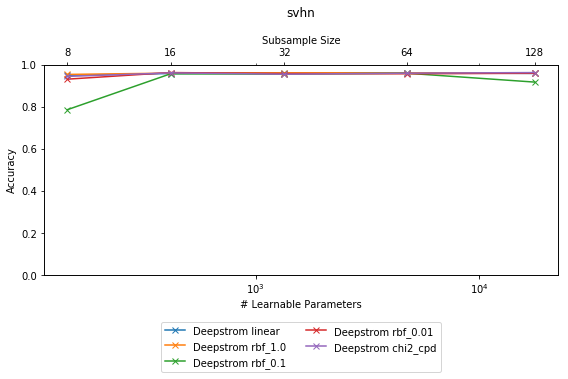

In [23]:
for DATANAME in datasets:
    df_data = df[df["dataset"] == DATANAME]
    nb_classes_dataset = nb_classes_datasets[DATANAME]
    nb_feature_conv = nb_feature_convs[DATANAME]
    f, ax = plt.subplots()
    for k_name in kernel_names:
        df_kernel = df_data[df_data["kernel"] == k_name]
        if k_name == "rbf":
            for g_val in gamma_values:
                k_name = "rbf" + "_" + str(g_val)
                df_rbf = df_kernel[df_kernel["--gamma"] == g_val]
                accuracies_kernel = df_rbf["test_acc"]
                subsample_sizes_kernel = df_rbf["--nys-size"].astype(int)
                np_param = (np.square(subsample_sizes_kernel) +  # m x m
                            subsample_sizes_kernel * nb_classes_dataset)  # m x c
                sorted_idx = np.argsort(np_param.values)
                xx = np_param.values[sorted_idx]
                print(accuracies_kernel.values[sorted_idx])
                yy = accuracies_kernel.values[sorted_idx].astype(float)
                ax.plot(xx, yy, marker="x", label=f"Deepstrom {k_name}")
        else:
            accuracies_kernel = df_kernel["test_acc"]
            subsample_sizes_kernel = df_kernel["--nys-size"].astype(int)
            np_param = (np.square(subsample_sizes_kernel) +  # m x m
                        subsample_sizes_kernel * nb_classes_dataset)  # m x c
            sorted_idx = np.argsort(np_param.values)
            xx = np_param.values[sorted_idx]
            print(accuracies_kernel.values[sorted_idx])
            yy = accuracies_kernel.values[sorted_idx].astype(float)
            ax.plot(xx, yy, marker="x", label=f"Deepstrom {k_name}")


    post_processing_figures(f, ax, np_param, subsample_sizes_kernel)